In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions as fun  # importing our cleaning functions

file_path = r"GSAF5.xls"
df_original = pd.read_excel(file_path)
df = df_original.copy()

In [2]:
df.columns = df.columns.map(fun.rename_col)

In [3]:
df = fun.filtering_australia_2000(df)

In [4]:
df = fun.drop_columns(df)

In [5]:
df.head()

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_,source
0,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",Swimming,Lauren O'Neill,F,29,Right leg bitten,20h00,Bull shark,"Nine News, 12/31/2024"
1,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF"
2,28 Dec-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surfing,Khai Cowley,M,15,FATAL,13h30,"White shark, 13'","S. DeMarchi, GSAF"
3,25 Dec-2023,2023.0,Unprovoked,AUSTRALIA,New South Wales,Old Bar,Surfing,Julian McLennan,M,16,Injury to right thigh,16h30,NaN,"9 News, 12/26/2023"
4,24-Dec-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Foil Boarding,Troy Brown,M,46,Puncture wounds to right ankle,15h00,Broze whaler?,"9 News, 12/25/2023"


In [6]:
df = fun.clean_activity(df)

In [7]:
df = fun.clean_attack_type(df)

In [8]:
df = fun.clean_state(df)

In [9]:
df["time"].unique()

array(['20h00', '13h00', '13h30', '16h30', '15h00', '16h32', '11h30',
       '13h20', '14h00', '10h20', '17h00', '07h45', '10h00', '08h45', nan,
       '10h10', '11h20', '07h15', '18h00', '08h00', '15h30', '-16h30',
       '11h15', '19h00', '07h00', '12h15', '15h20', '16h40', '07h50',
       '06h30', '10h30', '19h20', 'Dusk', '20h30', '12h30', '11h00',
       '15h40', '12h00', '17h30', '18h30', '07h58', '17h40', '14h20',
       '08h40', '06h00', '10h45', '16h00', 'Afternoon', '09h30', '14h15',
       '09h08', '11h45', '14h30', '10h40', 'Midday', '16h10', '12h58',
       '09h00', '16h21', '06h40', '06h15', 'Before 10h00', '06h50',
       '06h45', '13h45', 'Morning', '16h50', '17h35', '07h30',
       '19h00, Dusk', 'Night', '15h01', '08h30', '15h45', '02h00', '9h00',
       'Late afternoon', 'After noon', '22h00', 'Midnight', '18h15',
       '17h10', '09h45', '05h00', 'Sometime between 06h00 & 08hoo',
       '17h20', '17h01', '08h20', '10h55', '12h45', '0830', '16h45',
       '14h50', '1

In [34]:
df = fun.clean_time(df)

In [35]:
df = fun.new_time(df)

In [12]:
df.head()

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_,source,time_hour,time_of_day
0,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",swimming,Lauren O'Neill,F,29,Right leg bitten,20h00,Bull shark,"Nine News, 12/31/2024",20,20
1,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",surfing,Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF",13,13
2,28 Dec-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,surfing,Khai Cowley,M,15,FATAL,13h30,"White shark, 13'","S. DeMarchi, GSAF",13,13
3,25 Dec-2023,2023.0,Unprovoked,AUSTRALIA,New South Wales,Old Bar,surfing,Julian McLennan,M,16,Injury to right thigh,16h30,NaN,"9 News, 12/26/2023",16,16
4,24-Dec-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,other_activities,Troy Brown,M,46,Puncture wounds to right ankle,15h00,Broze whaler?,"9 News, 12/25/2023",15,15


In [13]:
df["time_of_day"].unique()

array([20, 13, 16, 15, 11, 14, 10, 17, 7, 8, 'invalid', 18, 19, 12, 6, 24,
       'afternoon', 9, 'morning', 2, 22, 5, 'evening', 23], dtype=object)

In [14]:
def categorize_time(hour):
    """Categorizes the hour into time of day"""
    if isinstance(hour, int):
        if 6 <= hour <= 12:
            return "morning"
        elif 12 < hour <= 18:
            return "afternoon"
        elif 18 < hour <= 24:
            return "evening"
        elif 1 < hour <= 5:
            return "night"
        else:
            return "invalid"
    else:
        return "invalid"
    
df["time_of_day"] = df["time_of_day"].apply(categorize_time)

In [15]:
df["time_of_day"].unique()

array(['evening', 'afternoon', 'morning', 'invalid', 'night'],
      dtype=object)

In [16]:
df['species'] = df['species_'].str.replace("_", "")

In [17]:
df['species'] = df['species'].astype(str).str.lower()

def simplify_species(name):
    if 'white' in name:
        return 'white shark'
    elif 'thought to' in name:
        return 'not sure of species'
    elif 'involvement not confirmed' in name:
        return 'not a shark attack'
    elif 'no shark involvement' in name:
        return 'not a shark attack'
    elif 'not a' in name:
        return 'not a shark attack'
    elif 'shark involvement prior to death was not confirmed' in name:
        return 'not a shark attack'
    elif 'questionable' in name:
        return 'not a shark attack'
    elif 'jet ski bitten' in name:
        return 'not a shark attack'
    elif 'tiger' in name:
        return 'tiger shark'
    elif 'bull' in name:
        return 'bull shark'
    elif 'bronze whaler' in name:
        return 'copper shark'
    elif 'broze' in name:
        return 'copper shark'
    elif 'blacktip' in name:
        return 'blacktip shark'
    elif 'wobbegong' in name:
        return 'wobbegong shark'
    elif 'sandtiger' in name:
        return 'sandtiger shark'
    elif 'Blacktip reef' in name:
        return 'blacktip reef shark'
    elif 'zebra reef' in name:
        return 'zebra shark'
    elif 'sevengill' in name:
        return 'sevengill shark'
    elif 'grey nurse' in name:
        return 'greynurse shark'
    elif 'reef' in name:
        return 'grey reef shark'
    elif 'lemon' in name:
        return'lemon shark'
    elif 'sickelfin' in name:
        return'lemon shark'
    elif 'raggedtooth' in name:
        return 'raggedtooth shark'
    elif 'copper' in name:
        return 'copper shark'
    elif 'whitetip' in name:
        return 'whitetip shark'
    elif 'hammerhead' in name:
        return 'hammerhead shark'
    elif 'carcharhinus tilstoni' in name:
        return 'Carcharhinus tilstoni shark'
    elif 'blind' in name:
        return 'blind shark'
    elif 'mako' in name:
        return 'mako shark'
    elif 'wfite shark' in name:
        return  'white shark'
    elif 'tawny nurse' in name:
        return 'tawny nurse shark'
    else:
        return 'other'

df['species'] = df['species'].apply(simplify_species)


num_attacks = len(df)
num_attacks




514

In [18]:
top_species = df['species'].value_counts().head(10)

In [19]:
# Filtered the 'not a shark attack' category from top_species
top_5_species = top_species[top_species.index != 'not a shark attack']

print(top_5_species)

other                  229
white shark            113
bull shark              35
copper shark            35
wobbegong shark         28
tiger shark             14
grey reef shark         12
not sure of species      4
greynurse shark          4
Name: species, dtype: int64


In [20]:
# Function to categorize injury
def categorize_injury(injury):
    if isinstance(injury, str):
        lower_injury = injury.lower()
        if any(word in lower_injury for word in ['bitten', 'severe injuries', 'multiple injuries', 'severe injurys', 'severe injury', 'severe','severely', 'significant' ]):
            return 'Severe'
        elif 'fatal' in lower_injury or 'remains' in lower_injury:
            return 'Fatal'
        elif any(word in lower_injury for word in ['lacerations', 'minor injury', 'no injury', 'injury', 'injured']):
            return 'Minor/No Injury'
        else:
            return 'Unknown'
    else:
        return 'Unknown'

# Function to check if an injury was provoked
def check_provoked(injury):
    if isinstance(injury, str) and 'provoked' in injury.lower():
        return 'Provoked'
    else:
        return 'Unprovoked'

# applied functions to categorize injuries and check if they were provoked
df['injury_category'] = df['injury'].apply(categorize_injury)
df['provoked_status'] = df['injury'].apply(check_provoked)

# Identified the top 5 species by occurrence
top_species = df['species'].value_counts().nlargest(5).index

# Filtered the dataframe to only include the top 5 species
top_5_species = df[df['species'].isin(top_species)]

# Grouped by species and injury category, then counted the occurrences for the filtered dataset
species_injury_counts_top = top_5_species.groupby(['species', 'injury_category']).size().reset_index(name='counts')

species_injury_top_5 = species_injury_counts_top.pivot_table(index='species', columns='injury_category', values='counts', fill_value=0)

species_injury_top_5

injury_category,Fatal,Minor/No Injury,Severe,Unknown
species,,,,
bull shark,5,11,13,6
copper shark,0,12,9,14
other,14,121,40,54
white shark,26,45,27,15
wobbegong shark,0,7,9,12


In [21]:
species_injury_correlation = pd.crosstab(df['species'], df['injury_category'])

species_injury_correlation

injury_category,Fatal,Minor/No Injury,Severe,Unknown
species,,,,
blacktip shark,0,1,2,1
blind shark,0,0,1,0
bull shark,5,11,13,6
copper shark,0,12,9,14
grey reef shark,0,5,4,3
greynurse shark,0,1,0,3
hammerhead shark,0,0,0,1
lemon shark,0,3,1,0
mako shark,0,0,0,2


In [22]:
top_locations = df['location'].value_counts().head(5).index

top_locations_data = df[df['location'].isin(top_locations)]

species_injury_location_correlation = pd.crosstab(index=[top_locations_data['species'], top_locations_data['injury_category']],
                                                  columns=top_locations_data['location'])

species_injury_location_correlation
attacks_by_location = df['location'].value_counts()

top_attacks_locations = attacks_by_location

top_attacks_locations

Lennox Head                4
Sunshine Beach             3
Cid Harbor, Whitsundays    3
Lighthouse Beach           3
Crescent Head              3
                          ..
The Farm                   1
Moreton Bay                1
Kelpies near Wylie Bay     1
Weipa                      1
Adelaide                   1
Name: location, Length: 450, dtype: int64

In [23]:
species_injury_counts_top = top_5_species.groupby(['species', 'state']).size().reset_index(name='counts')

species_injury_top_5 = species_injury_counts_top.pivot_table(index='species', columns='state', values='counts', fill_value=0)
species_injury_top_5

state,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Territory of Cocos (Keeling) Islands,Torres Strait,Victoria,Western Australia
species,,,,,,,,,
bull shark,10,1,15,0,0,0,0,0,9
copper shark,12,2,2,5,0,1,0,2,11
other,91,3,45,8,4,0,0,24,53
white shark,37,0,4,21,4,0,1,6,40
wobbegong shark,14,0,5,0,0,0,0,0,9


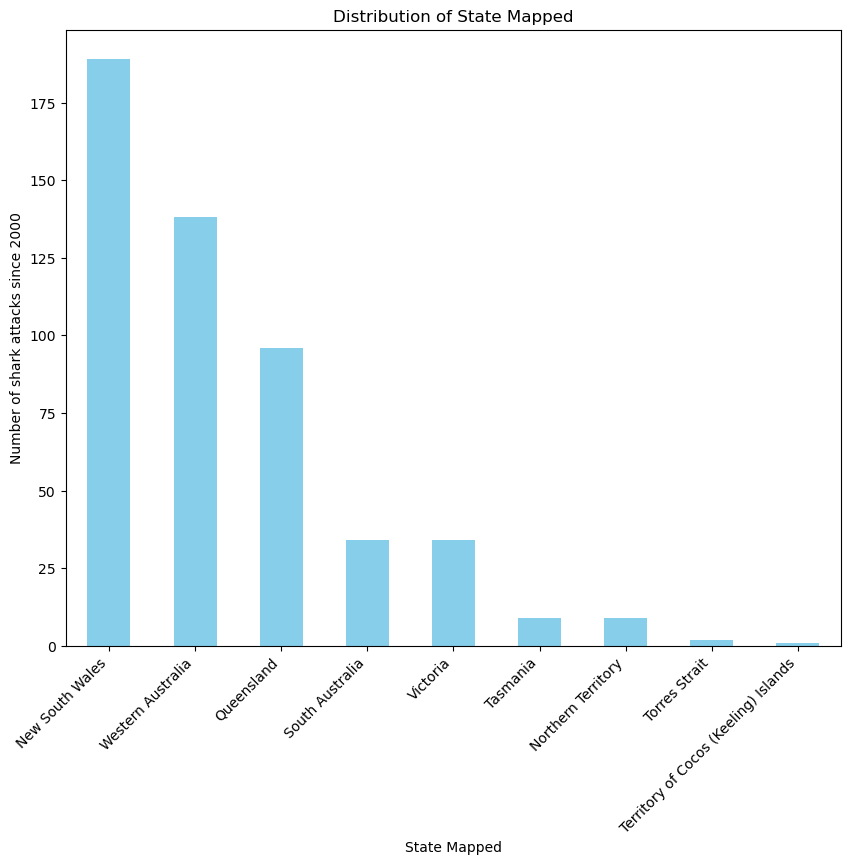

In [24]:
state_counts = df["state"].value_counts()

plt.figure(figsize=(10, 8))
state_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Number of shark attacks since 2000')
plt.xlabel('State Mapped')
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of State Mapped')
plt.show()

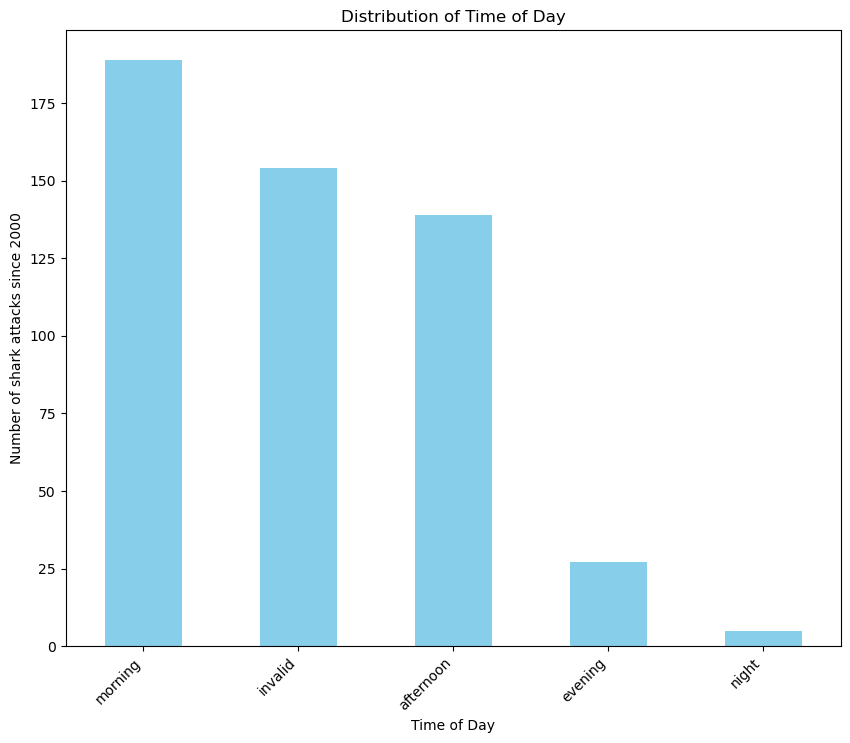

In [25]:
time_of_day_counts = df["time_of_day"].value_counts()
plt.figure(figsize=(10, 8))
time_of_day_counts.plot(kind='bar', color='skyblue')
plt.ylabel('Number of shark attacks since 2000')
plt.xlabel('Time of Day')
plt.xticks(rotation=45, ha="right")
plt.title('Distribution of Time of Day')
plt.show()

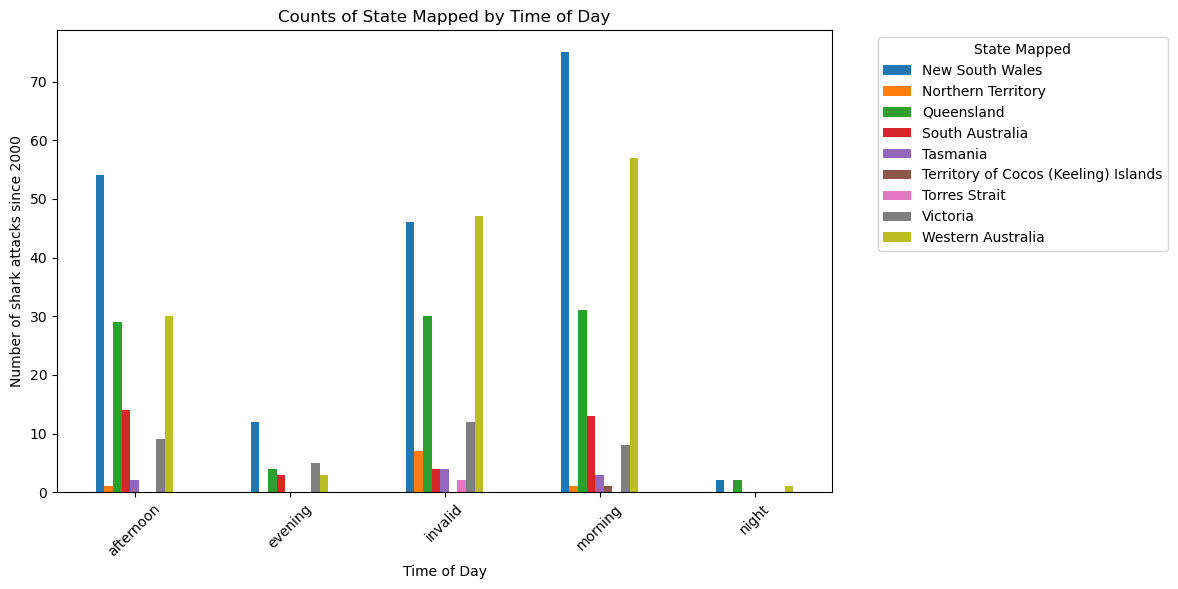

In [33]:
grouped_data = df.groupby(['time_of_day', 'state']).size().unstack(fill_value=0)


grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Time of Day')
plt.ylabel('Number of shark attacks since 2000')
plt.title('Counts of State Mapped by Time of Day')
plt.xticks(rotation=45)

plt.legend(title='State Mapped', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [29]:
activity = df ["activity"].value_counts()
print (activity)

surfing             207
fishing              97
other_activities     77
swimming             65
diving               30
snorkeling           28
kayaking             10
Name: activity, dtype: int64


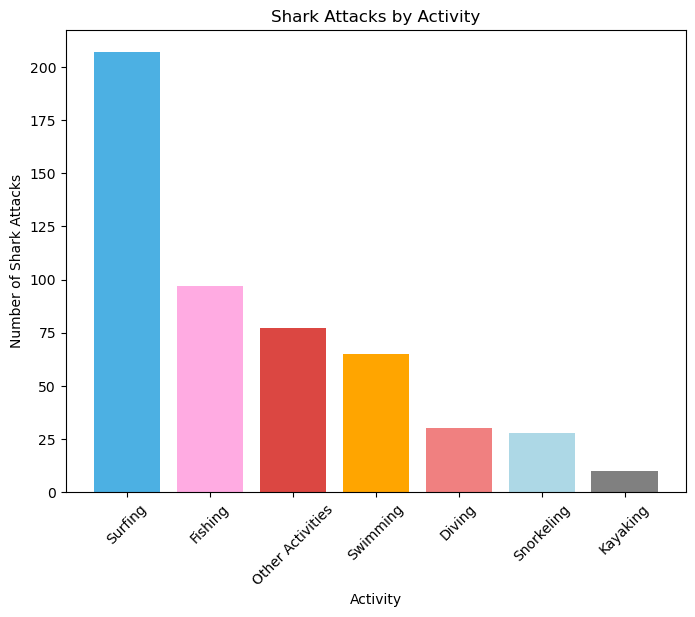

In [30]:
# List of colors for each bar
colors = ['#4CB0E3', '#FFABE2', '#db4742', 'orange', '#F08080', '#ADD8E6', 'gray']

# Data for activities involved in shark attacks
activity_counts = {
    "Surfing": 207,
    "Fishing": 97,
    "Other Activities": 77,
    "Swimming": 65,
    "Diving": 30,
    "Snorkeling": 28,
    "Kayaking": 10
}


# Creating the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(activity_counts.keys(), activity_counts.values(), color=colors)
plt.xlabel('Activity')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks by Activity')
plt.xticks(rotation=45)
plt.show()

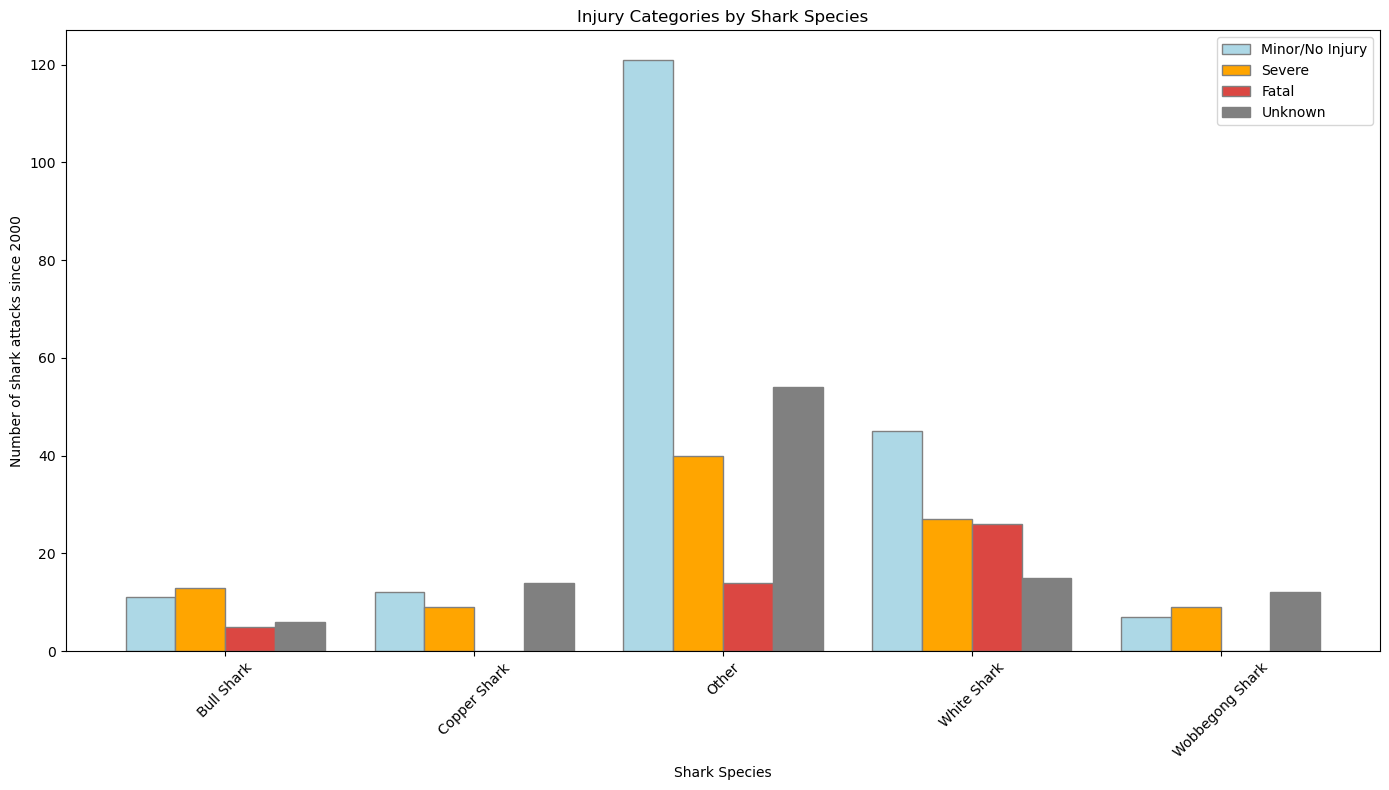

In [27]:
species = ['Bull Shark', 'Copper Shark', 'Other', 'White Shark', 'Wobbegong Shark']
fatal = [5, 0, 14, 26, 0]
minor_no_injury = [11, 12, 121, 45, 7]
severe = [13, 9, 40, 27, 9]
unknown = [6, 14, 54, 15, 12]

bar_width = 0.2

r1 = np.arange(len(species))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.figure(figsize=(14, 8))
plt.bar(r1, minor_no_injury, color='lightblue', width=bar_width, edgecolor='grey', label='Minor/No Injury')
plt.bar(r2, severe, color='orange', width=bar_width, edgecolor='grey', label='Severe')
plt.bar(r3, fatal, color='#db4742', width=bar_width, edgecolor='grey', label='Fatal')
plt.bar(r4, unknown, color='grey', width=bar_width, edgecolor='grey', label='Unknown')

plt.xlabel('Shark Species')
plt.ylabel('Number of shark attacks since 2000')
plt.title('Injury Categories by Shark Species')
plt.xticks([r + bar_width*1.5 for r in range(len(species))], species, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


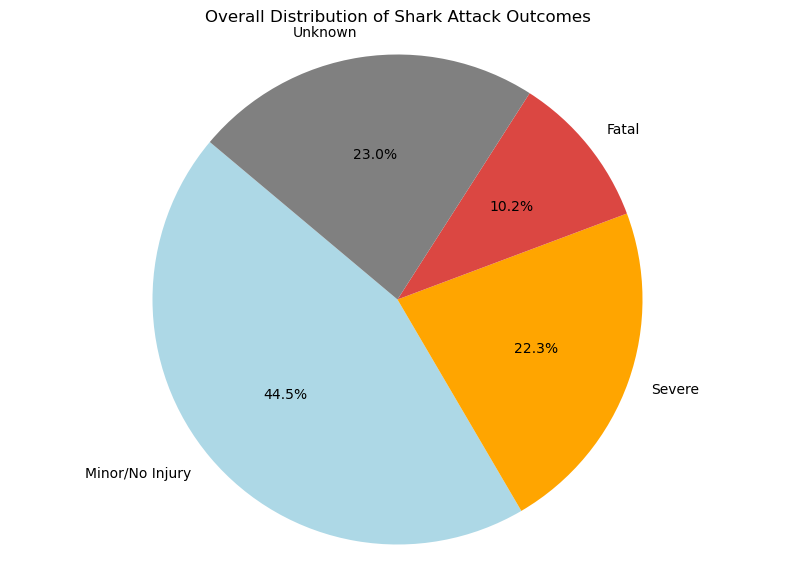

In [28]:
species = ['Bull Shark', 'Copper Shark', 'Other', 'White Shark', 'Wobbegong Shark']
fatal = [5, 0, 14, 26, 0]
minor_no_injury = [11, 12, 121, 45, 7]
severe = [13, 9, 40, 27, 9]
unknown = [6, 14, 54, 15, 12]

total_fatal = sum(fatal)
total_minor_no_injury = sum(minor_no_injury)
total_severe = sum(severe)
total_unknown = sum(unknown)

labels = ['Minor/No Injury', 'Severe', 'Fatal', 'Unknown']
sizes = [total_minor_no_injury, total_severe, total_fatal, total_unknown]
colors = ['lightblue', 'orange', '#db4742', 'grey']

plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Distribution of Shark Attack Outcomes')
plt.axis('equal') 
plt.show()


In [ ]:
plt.figure(figsize=(18, 10))

for i, species_name in enumerate(species):
    plt.subplot(2, 3, i+1) 
    sizes = [minor_no_injury[i], severe[i], fatal[i], unknown[i]]
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(species_name)

plt.tight_layout()
plt.show()